# Travail B

Application de l'algorithme DBscan à la BDD vote

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
vote_data = pd.read_csv("./vote.csv")
vote_data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


Dans ce notebook, nous allons appliquer la méthode DBscan à la BDD vote dans une méthode de clustering supervisée afin de vérifier si les clusters correspondent à "republican" ou "democrat"

### Preprocessing Data

Nous avons besoin d'encoder les données

In [17]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder().set_output(transform='pandas')
vote_data_encoded = le.fit_transform(vote_data)

In [18]:
vote_data_encoded = vote_data.replace(
    {
        'n':0,
        'y':1,
        '?':2,
        'republican':0,
        'democrat':-1,
    }
)

In [19]:
vote_data_encoded

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1,0
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2,0
2,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0,-1
3,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1,-1
4,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,0
431,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,-1
432,0,2,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0
433,0,0,0,1,1,1,2,2,2,2,0,1,1,1,0,1,0


In [20]:
X = vote_data_encoded.iloc[:, :-1]
y = vote_data_encoded.iloc[:, -1]

### DBscan

In [21]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(
    eps=1.01,
    min_samples=3,
).fit(X)
y_pred = clustering.labels_

In [22]:
y

0      0
1      0
2     -1
3     -1
4     -1
      ..
430    0
431   -1
432    0
433    0
434    0
Name: Class, Length: 435, dtype: int64

In [23]:
y_pred.reshape(-1, 1)

array([[ 0],
       [ 0],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [-1],
       [ 1],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 0],
       [ 1],
       [-1],
       [ 1],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.5954022988505747

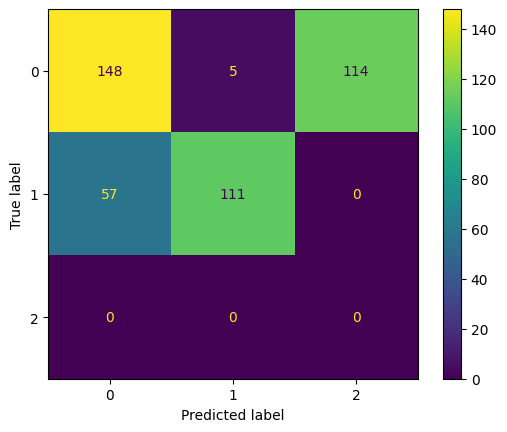

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

On remarque que la plupart des labels sont plutôt bien placés, sauf qu'il y a tout de même 114 instance non classifiées/